In [1]:
# Melhor documentário

import requests
from bs4 import BeautifulSoup

planilha = []

links_documentarios = ["https://www.imdb.com/title/tt9412098/?ref_=nv_sr_1?ref_=nv_sr_1",
                       "https://www.imdb.com/title/tt8488126/?ref_=nv_sr_1?ref_=nv_sr_1",
                       "https://www.imdb.com/title/tt7689958/?ref_=nv_sr_1?ref_=nv_sr_1",
                       "https://www.imdb.com/title/tt9573980/?ref_=fn_al_tt_1",
                       "https://www.imdb.com/title/tt5424228/?ref_=nv_sr_1?ref_=nv_sr_1",
                       "https://www.imdb.com/title/tt7476236/?ref_=nv_sr_1?ref_=nv_sr_1"]

for link in links_documentarios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome do filme
    acha_nome_filme = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_filme_sujo = acha_nome_filme.find("h1", {"class": ""}).text.strip() # Limpa só o nome do episódio
    
    lista = nome_filme_sujo.split("(")
    nome_filme = lista[0]
    nome_filme = nome_filme.strip()
    ano = lista[1]
    ano = ano.replace(")", "")
                            
    # Conjunto que acha a avaliação do filme
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"class": "small", "itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"filme": nome_filme, "ano": int(ano), "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'filme': 'Fyre', 'ano': 2019, 'nota': 7.3, 'votos': 27027}, {'filme': 'The Inventor: Out for Blood in Silicon Valley', 'ano': 2019, 'nota': 7.1, 'votos': 4665}, {'filme': 'Jane Fonda in Five Acts', 'ano': 2018, 'nota': 7.9, 'votos': 1316}, {'filme': 'Deixando Neverland', 'ano': 2019, 'nota': 7.1, 'votos': 20857}, {'filme': 'Love, Gilda', 'ano': 2018, 'nota': 7.4, 'votos': 1033}, {'filme': 'Minding the Gap', 'ano': 2018, 'nota': 8.1, 'votos': 5187}]


In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("documentario.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,ano,filme,nota,votos
5,2018,Minding the Gap,8.1,5187
2,2018,Jane Fonda in Five Acts,7.9,1316
4,2018,"Love, Gilda",7.4,1033
0,2019,Fyre,7.3,27027
1,2019,The Inventor: Out for Blood in Silicon Valley,7.1,4665
3,2019,Deixando Neverland,7.1,20857


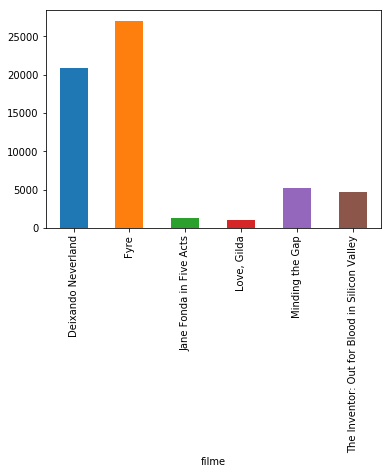

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("filme")["votos"].sum()
agrupamento1.plot.bar()

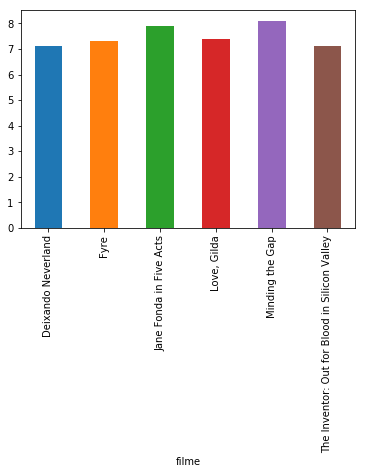

In [4]:
agrupamento2 = df.groupby("filme")["nota"].mean()
agrupamento2.plot.bar()